# 1) A little introductory brain teaser

The total number of possibilities of rolling 2 six sided dice is 36. Since the first die has 6 possibilities and the second has 6, then there are a total of 36. The only way to roll a 2 (snake eyes) is to roll 2 ones, which is only one of the 36 possible outcomes, thus giving a $\frac{1}{36}$. Roling a 7 can be achieved by roling a 1 and a 6, a 2 and a 5, a 3 and a 4, a 4 and a 3, a 5 and a 2, or a 1 and a 6, giving 6 possible ways to roll a 7, or a probability of  $\frac{6}{36}$, and thus a ratio of 1:6.

# 2) Probability of the sum of 2 six sided dice

In [28]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats

In [29]:
die_prob = [1/6]*6

In [30]:
# Mathematical approach
convolved_data = np.convolve(die_prob, die_prob, mode = "full").tolist()

Ways to roll:
<br />2 (1): 1 and 1
<br />3 (2): 1 and 2, 2 and 1
<br />4 (3): 1 and 3, 2 and 2, 3 and 1
<br />5 (4): 1 and 4, 2 and 3, 3 and 2, 4 and 1
<br />6 (5): 1 and 5, 2 and 4, 3 and 3, 4 and 2, 5 and 1
<br />7 (6): 1 and 6, 2 and 5, 3 and 4, 4 and 3, 5 and 2, 6 and 1
<br />8 (5): 2 and 6, 3 and 5, 4 and 4, 5 and 3, 6 and 2 
<br />9 (4): 3 and 6, 4 and 5, 5 and 4, 6 and 3
<br />10 (3): 4 and 6, 5 and 5, 6 and 4
<br />11 (2): 5 and 6, 6 and 5
<br />12 (1): 6 and 6

<br />This is the same as the distribution above, and is define programatically below

In [31]:
counting_data = [1,2,3,4,5,6,5,4,3,2,1]
quotients = []
for number in counting_data:
    quotients.append(number / 36)
counting_data = quotients

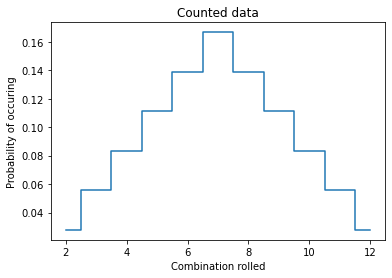

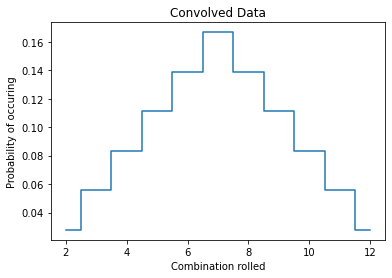

In [32]:
plt.step(x=range(2,13), y = counting_data, where = 'mid')
plt.xlabel("Combination rolled")
plt.ylabel("Probability of occuring")
plt.title("Counted data")
plt.show()

plt.step(x=range(2,13), y = convolved_data, where = 'mid')
plt.xlabel("Combination rolled")
plt.ylabel("Probability of occuring")
plt.title("Convolved Data")
plt.show()

# 3) Calculate the mean and the variance

In [33]:
mean = 0
# i+2 is used since the first value is 2, which means the itterator will always be 2 less than the combination value it is
# getting from the probability array
for i in range(11):
    mean += convolved_data[i] * (i + 2)
mean

7.0

In [34]:
dice_vals = [i for i in range(2,13)]
var = 0

for i in range(11):
    var += ((mean-dice_vals[i])**2) * convolved_data[i]
var

5.833333333333334

# 4) Average of 10 dice

In [35]:
convolved_data = np.convolve(die_prob, die_prob, mode = "full").tolist()
for i in range(8):
    convolved_data = np.convolve(convolved_data, die_prob, mode = "full").tolist()

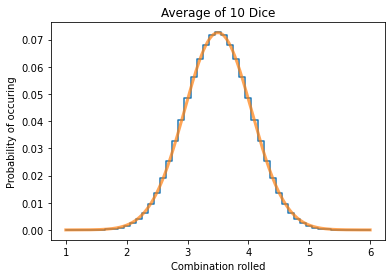

In [36]:
fig, ax = plt.subplots(1,1)

plt.step(x=np.linspace(1,6,51), y = convolved_data, where = 'mid')
x = np.linspace(1,6,10000)
ax.plot(x,scipy.stats.norm.pdf(x,loc = 3.5, scale = 0.55)/10,linewidth = 3,alpha = 0.7)

plt.xlabel("Combination rolled")
plt.ylabel("Probability of occuring")
plt.title("Average of 10 Dice")
plt.show()

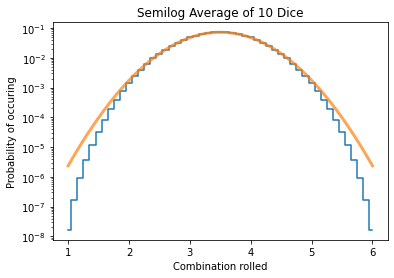

In [37]:
fig, ax = plt.subplots(1,1)
plt.step(x=np.linspace(1,6,51), y = convolved_data, where = 'mid')
x = np.linspace(1,6,10000)
ax.plot(x,scipy.stats.norm.pdf(x,loc = 3.5,scale = 0.55)/10,linewidth = 3,alpha = 0.7)

plt.xlabel("Combination rolled")
plt.ylabel("Probability of occuring")
plt.title("Semilog Average of 10 Dice")
plt.semilogy()
plt.show()

Technically, this plot is not a Gaussian distribution. At the tails, the distribution falls away from the gaussian curve. However, it is incredibly close to a gaussian, and for many intents, it can be considered a gaussian. After infinite convolutions, this will be a gaussian, however, until then it can only become more gaussain-like. As with any distribution, continuing to average it with itself will give us a gaussian distribution scaled down by the number of convolutions taken. As this approaches infinity, the distribution also approaches a perfect representation of a gaussian.

# 5) Sum and average of an initially Gaussian

In [38]:
# sets up bins to convolve
start = -100000
bins = [-1]*100
for i, end in zip(range(99), np.linspace(-8,8,99)):
    bins[i] = scipy.stats.norm.cdf(end) - scipy.stats.norm.cdf(start)
    start = end
bins[99] = scipy.stats.norm.sf(8)
bins[0] = bins[99]

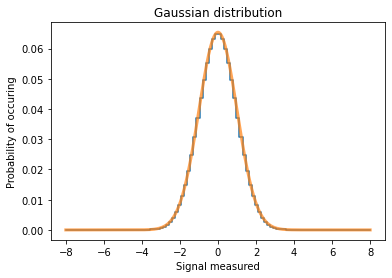

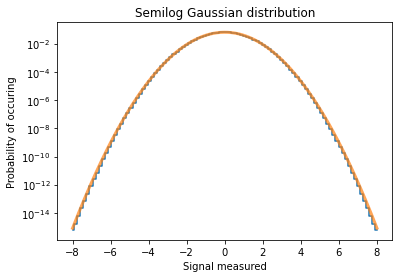

In [39]:
# Graphs the initiall distribution
fig, ax = plt.subplots(1,1)

plt.step(x=np.linspace(-8,8,100), y = bins, where = 'mid')
x = np.linspace(-8,8,10000)
ax.plot(x,scipy.stats.norm.pdf(x,scale = 1)/6.1,linewidth = 3,alpha = 0.7) # 6.1 fits the curve to the distribution

plt.xlabel("Signal measured")
plt.ylabel("Probability of occuring")
plt.title("Gaussian distribution")
plt.show()

fig, ax = plt.subplots(1,1)
plt.step(x=np.linspace(-8,8,100), y = bins, where = 'mid')
x = np.linspace(-8,8,10000)
ax.plot(x,scipy.stats.norm.pdf(x,scale = 1)/6.1,linewidth = 3,alpha = 0.7)

plt.xlabel("Signal measured")
plt.ylabel("Probability of occuring")
plt.title("Semilog Gaussian distribution")
plt.semilogy()
plt.show()

In [40]:
# self convolve 10 times for the sum
convolvedBins = bins
for i in range(10):
    convolvedBins = np.convolve(convolvedBins, bins, mode = "full").tolist()

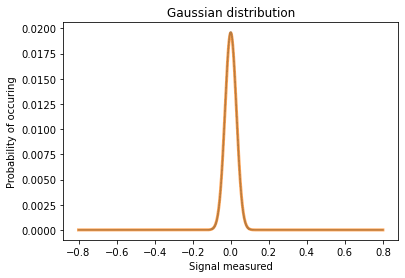

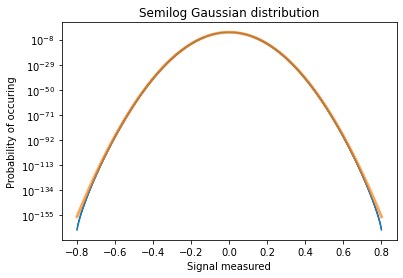

In [111]:
fig, ax = plt.subplots(1,1)

plt.step(x=np.linspace(-0.8,0.8,1090), y = convolvedBins, where = 'mid')
x = np.linspace(-0.8,0.8,10000)
ax.plot(x,scipy.stats.norm.pdf(x,scale = 0.030)/(680),linewidth = 3,alpha = 0.7) # 6.1 fits the curve to the distribution

plt.xlabel("Signal measured")
plt.ylabel("Probability of occuring")
plt.title("Gaussian distribution")
plt.show()

fig, ax = plt.subplots(1,1)
plt.step(x=np.linspace(-0.8,0.8,1090), y = convolvedBins, where = 'mid')
x = np.linspace(-0.8,0.8,10000)
ax.plot(x,scipy.stats.norm.pdf(x,scale = 0.030)/(680),linewidth = 3,alpha = 0.7)

plt.xlabel("Signal measured")
plt.ylabel("Probability of occuring")
plt.title("Semilog Gaussian distribution")
plt.semilogy()
plt.show()

After 10 convolutions, we see that the data graphs the exact same. While the data may not be EXACTLY the same due to the precision limitations of computers, we can see that the distribution is still a Gaussain, the average is the same as the sum, which is all the same as the original distribution. We know this since there is no scaling factor needed on the curve even after 10 convolutions. This means the sum and the average are the same. And we also know that since the same Gaussian curve is overlayed for the data both pre and post convolution, the data must be the same, within any reasonable degree of precision. This means that over time, nothing will change in the distribution, since it will only convolve to itself over and over again, and is therefore not time dependent. 